In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.impute import KNNImputer

In [2]:
dataframe = pd.read_csv('train.csv')

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
print("The shape of the training set is", dataframe.shape)

The shape of the training set is (1460, 81)


In [5]:
dataframe['Alley'] = dataframe['Alley'].fillna(value = 'None')

In [6]:
def corr(a):
    data = a.select_dtypes(exclude = 'object')
    numcorr = data.corr()
    plt.figure(figsize = (10, 1))
    sns.heatmap(numcorr.sort_values(by = 'SalePrice', ascending = False).head(1), cmap = 'Blues')
    plt.title(" Numerical features correlation with the sale price", weight='bold', fontsize=18)
    plt.xticks(weight='bold')
    plt.yticks(weight='bold', color='dodgerblue', rotation=0)


    plt.show()

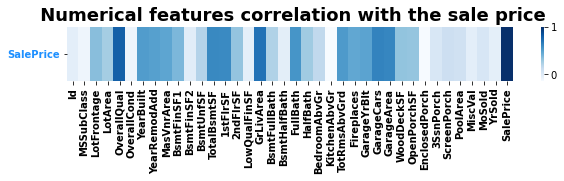

In [7]:
corr(dataframe)

In [8]:
numeric_data = dataframe.select_dtypes(include=[np.number])
categorical_data = dataframe.select_dtypes(exclude=[np.number])

In [9]:
numeric_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [10]:
categorical_data.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

#### Variable Identification

* Predictor Variables:

        'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',SaleCondition

* Target Variables:
    
    'SalePrice'

#### Data Types

* Numeric Data-Types:
   'Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'
* String Data-Types:
    'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'
    
       

In [11]:
# Let's have a closer look at the correlation between the predictors and the target
data = dataframe.select_dtypes(exclude = 'object')
numcorr = data.corr()
s = numcorr['SalePrice'].sort_values(ascending = False).head(10).to_frame()
s

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


We can see that the overall Quality of the housesand the Ground Area have a lot more correlation for Sale price.

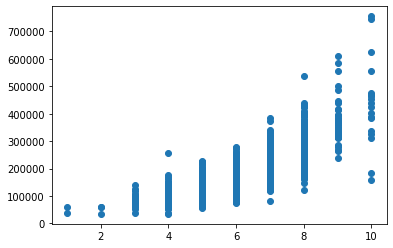

In [17]:
# Plotting a scatterplot for the OverallQual and SalePrice
plt.scatter(dataframe.OverallQual, dataframe.SalePrice)

We can see a range of price for different OverallQual points and all-in-all there seems to bea a linear realtionship between the SalePrice.

Text(0, 0.5, 'Sale Price')

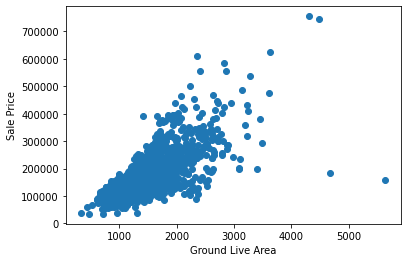

In [23]:
# Plotting a scatterplot for the GrLivArea and SalePrice
plt.scatter(dataframe.GrLivArea, dataframe.SalePrice)
plt.xlabel("Ground Live Area")
plt.ylabel("Sale Price")

We can see that there is a possible Outlier and a certain high leverage point(2  to be precise).

Text(0, 0.5, 'Sale Price')

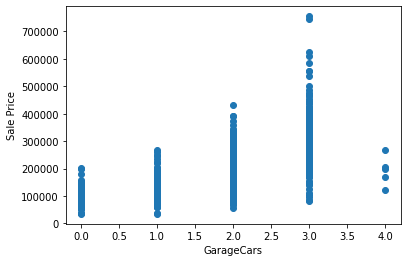

In [24]:
# Plotting a scatterplot for the GarageCars and SalePrice
plt.scatter(dataframe.GarageCars, dataframe.SalePrice)
plt.xlabel('GarageCars')
plt.ylabel("Sale Price")

An linear rise in prices as the garagecars number increases but a sharp decline for the number 4 cars. It might mean that people generally have a between 1-3 cars and don't deemed a garage with 4 cars space necessary.

In [36]:
# GaragerCars is basically a multi-level predictor.
# Lets take the mean of the prices based on the GarageCars
# as seen form results the abouve hypothesisis true.
zero = dataframe[dataframe.GarageCars == 0][["GarageCars", "SalePrice"]]
one = dataframe[dataframe.GarageCars == 1][["GarageCars", "SalePrice"]]
two = dataframe[dataframe.GarageCars == 2][["GarageCars", "SalePrice"]]
three = dataframe[dataframe.GarageCars == 3][["GarageCars", "SalePrice"]]
four = dataframe[dataframe.GarageCars == 4][["GarageCars", "SalePrice"]]
print("The mean price for the the O garage cars is {}".format(zero.SalePrice.mean()))
print("The mean price for the the 1 garage cars is {}".format(one.SalePrice.mean()))
print("The mean price for the the 2 garage cars is {}".format(two.SalePrice.mean()))
print("The mean price for the the 3 garage cars is {}".format(three.SalePrice.mean()))
print("The mean price for the the 4 garage cars is {}".format(four.SalePrice.mean()))

The mean price for the the O garage cars is 103317.28395061729
The mean price for the the 1 garage cars is 128116.68834688347
The mean price for the the 2 garage cars is 183851.66383495147
The mean price for the the 3 garage cars is 309636.1215469613
The mean price for the the 4 garage cars is 192655.8


Text(0, 0.5, 'Sale Price')

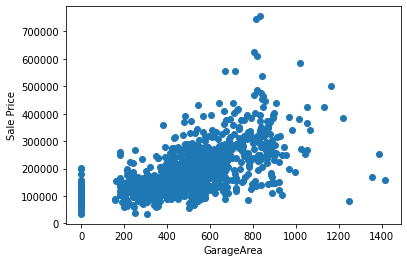

In [37]:
# Plotting a scatterplot for the GarageArea and SalePrice
plt.scatter(dataframe.GarageArea, dataframe.SalePrice)
plt.xlabel('GarageArea')
plt.ylabel("Sale Price")

The zeros are probably the the houseses with no garage. We can make another column about houses with garage or no garage.

Text(0, 0.5, 'Sale Price')

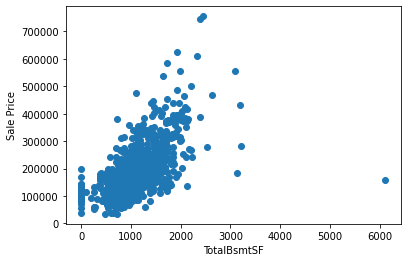

In [39]:
# Plotting a scatterplot for the TotalBsmtSF and SalePrice
#There are a few outliers and a high leverage point.
plt.scatter(dataframe.TotalBsmtSF, dataframe.SalePrice)
plt.xlabel('TotalBsmtSF')
plt.ylabel("Sale Price")

> Lets take a look at the categorical data now.

# Test Results

In [ ]:
dataframe1 = pd.read_csv('test.csv')

In [ ]:
dataframe1.head()

In [ ]:
dataframe1 = dataframe1.drop(columns = ['Id','Alley', 'PoolQC', 'Fence', 'MiscFeature', ])

In [ ]:
numeric_data_test = dataframe1.select_dtypes(include=[np.number])
categorical_data_test = dataframe1.select_dtypes(exclude=[np.number])

In [ ]:

print('Missing: %d' % sum(np.isnan(numeric_data_test.values).flatten()))

### Missing Value Treatment

First we'll look at the Numeric data.

In [ ]:
X_test = numeric_data_test.values


In [ ]:

print('Missing: %d' % sum(np.isnan(X_test).flatten()))

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(X_test)
Xtrans_test = imputer.transform(X_test)

In [ ]:
from numpy import isnan
print('Missing: %d' % sum(np.isnan(Xtrans_test).flatten()))

In [ ]:
df1_test = pd.DataFrame(data = Xtrans_test, columns = numeric_data_test.columns)

In [ ]:
#Feature-Selection for numeric data-types
numeric_sel_test = df1_test[a1[:20]]

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(categorical_data_test)
x_cat = imp.transform(categorical_data_test)
categorical_data_test1 = pd.DataFrame(data = x_cat, columns = categorical_data_test.columns)

In [ ]:
#Encoding of the categorical data
categorical_data_test11 = categorical_data_test1[list2].apply(LabelEncoder().fit_transform)

In [2]:
categorical_data_test12 = categorical_data_test1[list1].apply(LabelEncoder().fit_transform)

NameError: name 'categorical_data_test1' is not defined

In [ ]:
#Feature Selection of binary data
binary_leveled_data_test = categorical_data_test11[['CentralAir', 'Street']]

In [ ]:
binary_leveled_data_test

In [ ]:
ohe = OneHotEncoder(sparse = False)
cat_test1 = pd.DataFrame(ohe.fit_transform( categorical_data_test1[list1]))

In [ ]:
cat_test1.columns = ohe.get_feature_names(list1)

In [ ]:
#Multi-Level data
multi_cat_test = cat_test1[a3[:18]]

In [ ]:
#Final Test Data
final_test = pd.concat([multi_cat_test, numeric_sel_test, binary_leveled_data_test], axis = 1)

In [ ]:
final_test

## Test Prediction

### Linear Regression

In [ ]:
y_regression_test = regression.predict(final_test)

In [ ]:
y_dtr_test = dtr.predict(final_test)

In [ ]:
y_rf_test = rf.predict(final_test)

In [ ]:
y_xgb_test = xgb.predict(final_test)

In [ ]:
dataframe_test= pd.read_csv('test.csv')

In [ ]:
xgb = pd.DataFrame(data = y_xgb_test, columns = ['SalePrice'])
xgb1 = pd.concat([dataframe_test['Id'], xgb], axis = 1)

In [ ]:
regression = pd.DataFrame(data = y_regression_test, columns = ['SalePrice'])
regression1 = pd.concat([dataframe_test['Id'], regression], axis = 1)

In [ ]:
dtr = pd.DataFrame(data = y_dtr_test, columns = ['SalePrice'])
dtr1 = pd.concat([dataframe_test['Id'], dtr], axis = 1)

In [ ]:
rf = pd.DataFrame(data = y_rf_test, columns = ['SalePrice'])
rf1 = pd.concat([dataframe_test['Id'], rf], axis = 1)

In [ ]:
regression1.to_csv('regression1.csv', index = False)
dtr1.to_csv('dtr1.csv', index = False)
rf1.to_csv('rf1.csv', index = False)

In [ ]:
xgb1.to_csv('xgb.csv', index = False)